In [109]:
import numpy as np
import matplotlib.pyplot as plt
import time

def timeit(func):
    def wrapper(*arg, **kw):
        t1 = time.time()
        res = func(*arg, **kw)
        t2 = time.time()
        print("{0} took {1}s".format(func.__name__, (t2 - t1)))
        return res
    return wrapper

arr = np.genfromtxt("xdata.txt")
data = arr

mu_hat = arr.mean()
mu_hat

2.5384902240000002

log likelihood:
$$l(\lambda | x) = \frac{n}{2} \log(\lambda) - \frac{n}{2}\log(2\pi) - \frac{3}{2} \sum_{i=1}^{n} \log(x_i) - \frac{\lambda}{2\mu^2} \sum_{i=1}^{n} (x_i - \mu)^2$$

$$\frac{dl(\lambda | x)}{d\lambda} = \frac{n}{2\lambda} - \frac{(x_i-\mu)^2}{2\mu^2}$$

funl took 0.0s


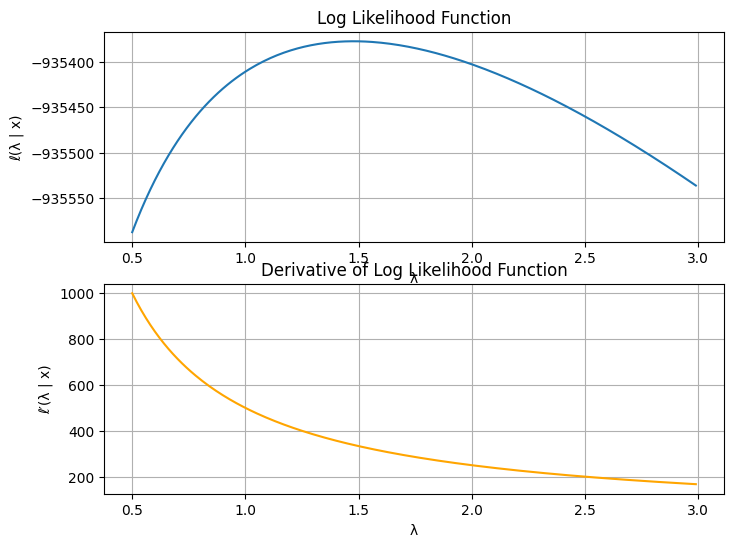

In [110]:
delta = 0.01
lambda_values = np.arange(0.5,3,delta)

@timeit
def funl(mu, lambdas, arr):
    n = len(arr)
    log_likelihoods = (n/2)*np.log(lambdas) - (1/2) * (2*np.pi*arr**3).sum() - lambdas * (((arr - mu)**2)/((2*mu**2)*arr)).sum()
    return log_likelihoods

def funderivativel(mu, lambdas, arr):
    n = len(arr)
    log_likelihoods_derivatives = (n/(2*lambdas)) - (((arr - mu)**2)/(2*mu**2 * arr)).mean()
    return log_likelihoods_derivatives


log_likelihood = funl(mu_hat, lambda_values, arr)
derivative_log_likelihood = funderivativel(mu_hat, lambda_values, arr)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot ℓ(λ | x)
axes[0].plot(lambda_values, log_likelihood, label='Log Likelihood')
axes[0].set_title('Log Likelihood Function')
axes[0].set_xlabel('λ')
axes[0].set_ylabel('ℓ(λ | x)')
axes[0].grid(True)

# Plot ℓ′(λ | x)
axes[1].plot(lambda_values, derivative_log_likelihood, label='Derivative of Log Likelihood', color='orange')
axes[1].set_title('Derivative of Log Likelihood Function')
axes[1].set_xlabel('λ')
axes[1].set_ylabel('ℓ′(λ | x)')
axes[1].grid(True)

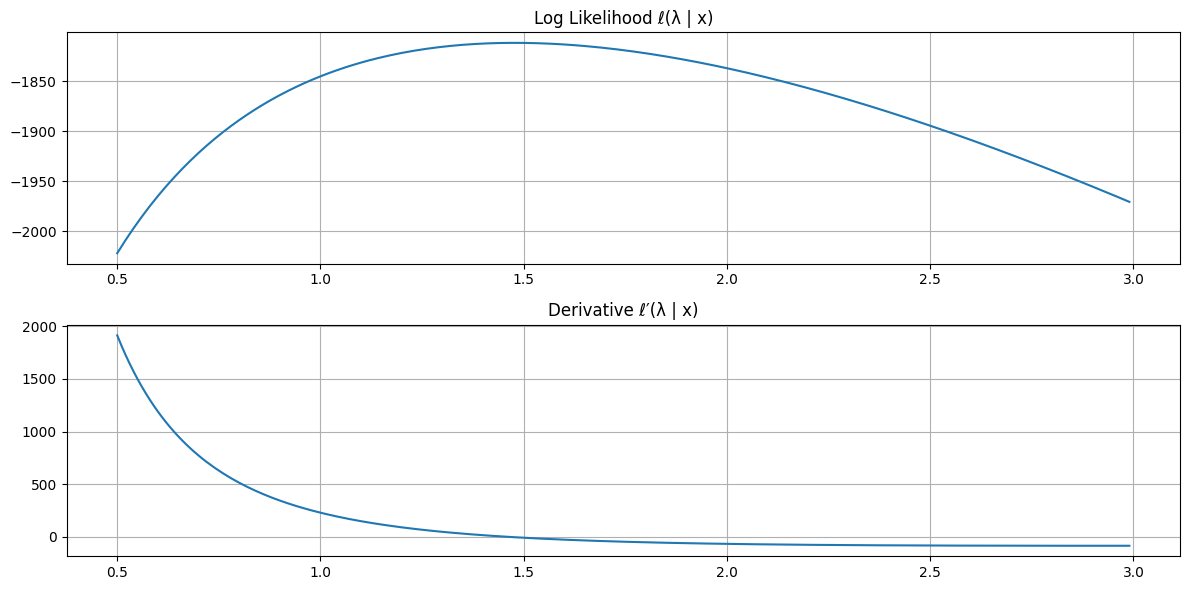

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PDF of the inverse Gaussian distribution
def inverse_gaussian_pdf(x, mu, lambda_param):
    return (lambda_param / (2 * np.pi * x**3))**0.5 * np.exp(-(lambda_param * (x - mu)**2) / (2 * mu**2 * x))

# Define a range of λ values
#lambda_values = np.linspace(0.01, 2, 1000)  # Adjust the range and scale as needed

# Calculate ℓ(λ | x) for each λ value
log_likelihood = np.zeros_like(lambda_values)

for i, lambda_param in enumerate(lambda_values):
    log_likelihood[i] = np.sum(np.log(inverse_gaussian_pdf(data, mu_hat, lambda_param)))

# Calculate the derivative ℓ′(λ | x) for each λ value
derivative = np.zeros_like(lambda_values)

for i, lambda_param in enumerate(lambda_values):
    derivative[i] = np.sum((data - mu_hat)**2 / (mu_hat**3 * lambda_param**2) - 1 / (2 * lambda_param))

# Create subplots
plt.figure(figsize=(12, 6))

# Plot ℓ(λ | x)
plt.subplot(2, 1, 1)
plt.plot(lambda_values, log_likelihood)
plt.title('Log Likelihood ℓ(λ | x)')
plt.grid()

# Plot ℓ′(λ | x)
plt.subplot(2, 1, 2)
plt.plot(lambda_values, derivative)
plt.title('Derivative ℓ′(λ | x)')
plt.grid()

plt.tight_layout()
plt.show()

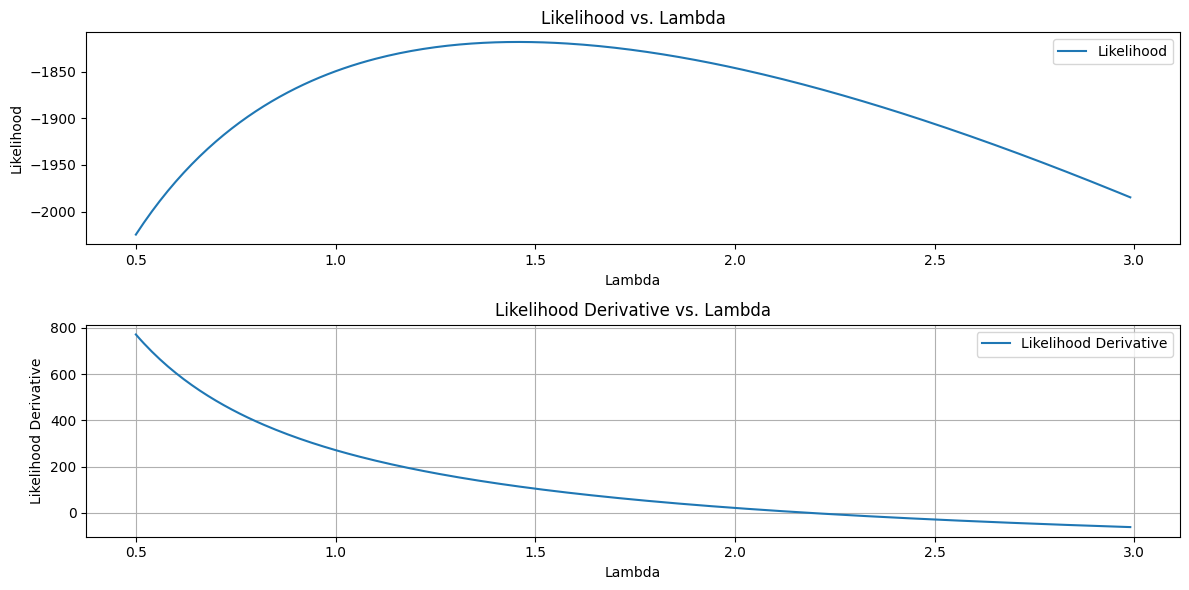

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def likelihood(x, mu, lam):
    n = len(x)
    term1 = (n / 2) * np.log(lam)
    term2 = -0.5 * np.sum(np.log(2 * np.pi * x**3))
    term3 = -np.sum((lam * (x - mu)**2) / (2 * mu**2 * x))
    return term1 + term2 + term3

def likelihood_derivative(x, mu, lam):
    n = len(x)
    d_lambda = n / (2 * lam)
    d_mu = np.sum(((x - mu)**2) / (mu**3 * x))
    return d_lambda - d_mu

# Example usage:
x_values = arr
mu_value = 3.0

likelihood_values = []
likelihood_derivative_values = []

# Calculate likelihood and its derivative for each lambda value
for lam in lambda_values:
    likelihood_result = likelihood(x_values, mu_value, lam)
    likelihood_derivative_result = likelihood_derivative(x_values, mu_value, lam)
    likelihood_values.append(likelihood_result)
    likelihood_derivative_values.append(likelihood_derivative_result)

# Plot the likelihood
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(lambda_values, likelihood_values, label='Likelihood')
plt.xlabel('Lambda')
plt.ylabel('Likelihood')
plt.title('Likelihood vs. Lambda')
plt.legend()

# Plot the likelihood derivative
plt.subplot(2, 1, 2)
plt.plot(lambda_values, likelihood_derivative_values, label='Likelihood Derivative')
plt.xlabel('Lambda')
plt.ylabel('Likelihood Derivative')
plt.title('Likelihood Derivative vs. Lambda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()